In [1]:
import matplotlib.pyplot as plt    # import matplotlib
import numpy as np                 # import numpy

In [2]:
from sweatman_model_variables_parameters import *
import sweatman_model_functions
from sweatman_model_functions import *

In [3]:
# def dvdt()
# vsigma_all=[] 
dv_F_all=[]
T, dt = 7000, 0.01
range_t = np.arange(0, T, dt)
Lt = range_t.size

G = np.zeros(Lt)
Gg = np.zeros(Lt)
I = np.zeros(Lt)
NEFAp = np.zeros(Lt)
VLDLTG = np.zeros(Lt)
L = np.zeros(Lt)
F = np.zeros(Lt)

G[0] =78.64593588448656#78.7 #100
Gg[0] =67.12688214885546 # 67 % 80
I[0] =0.28670621602452484 # 0.312 
NEFAp[0]  = 13.44
VLDLTG[0] = VLDLTG0 #VLDLTG
L[0]=L0
F[0] = F0

MLipid =MLipid0
HLipid =HLipid0
CHOin = 360

vSL0=1
vASI0 = 1
rLI = rLI0
rLox = rLox0
TGin = TGin0
for it in range(Lt-1):
#     vASI = ASI  * fASi(aA,L,L0,p1) * gSi(CHOin,CHOin0)
    vyCHO = yCHO(CHOin,CHOin0)
    vASI = fASi(aA,L[it],L0,p1)
    vPSI = fXLIPIDSi(aP,MLipid,MLipid0,p2)
    vHSI = fXLIPIDSi(aH,HLipid,HLipid0,p3)
    
    vSL = fSL(aL,VLDLTG[it],VLDLTG0,F[it],F0,p5,p6)
    vLep_minus=fLep_minus(L[it],L0,vSL,SL)
    vLep_plus=fLep_plus(L[it],L0,vSL,SL)
#     vLep_minus=fLep_minus(L0,L0,vSL0,SL)
#     vLep_plus=fLep_plus(L0,L0,vSL0,SL)
    vfast = ffast(CHOin,CHOin0,aCHO)
    vfed = ffed(vfast)
    
    vHGPI=fHGPI( vHSI,I[it],I0 )
    vHGPL=fHGPL(vLep_minus)
    vHGPGg = fHGPGg(Gg[it],Gg0)
    
    vHGP=HGP(HGP0,vHGPI,vHGPGg,vHGPL)
    vGlu_eff=fGlu_eff(EG0,vSL,SL,L[it],L0,G[it])
    vmuscle_glu_intake=fmuscle_glu_intake(PSI,vPSI,vLep_plus,I[it],G[it])
    vadipose_glu_intake=fadipose_glu_intake(ASI,vASI,vLep_minus,SI0,F[it],F0,I[it],G[it])
    
    vsigma=fsigma(sigma_r,vLep_minus,G[it],alpha_gi)
    
    vNEFApI=fNEFApI(vASI,ASI,I[it],I0)
    vVLDLTGI=fVLDLTGI(HSI,vHSI,I[it],I0)
    vLI=fLI(KL,vASI,ASI,I[it],I0) #insulin effect
    
    vADNL=fADNL(rADNL,vLep_minus,vyCHO,ASI,vASI,I[it])
    vfatplus=ffatplus(TGin,XCMTG,vfast,kVLDLTGpfast,VLDLTG[it],vfed,kVLDLTGpfed,vADNL,kCHO)
    vfatminus=ffatminus(rLI,vfast,vLep_plus,vASI,ASI,I[it],I0,F[it],F0,rLox,ATGox,vfed)
#     vADNL=fADNL(rADNL,vLep_minus,vyCHO,ASI,vASI0,I0)
#     vfatplus=ffatplus(TGin,XCMTG,vfast,kVLDLTGpfast,VLDLTG0,vfed,kVLDLTGpfed,vADNL,kCHO)
#     vfatminus=ffatminus(rLI,vfast,vLep_plus,vASI0,ASI,I0,I0,F[it],F0,rLox,ATGox,vfed)    
    
    dv_G =dG_dt(vfast,vHGP , KGP ,U0 , vGlu_eff , vmuscle_glu_intake , vadipose_glu_intake)*dt
    dv_I =dI_dt(vfast,beta, vsigma,LBM,Vplbm,lambdaI, I[it],Iin)*dt
    dv_Gg =dGgp_dt(vfast,sigma_Gg, vLep_minus, ACSI,vASI, I[it], I0, lambda_Gg,Gg[it],Ggin)*dt
    dv_NEFAp =dNEFAp_dt(vfast,rLI, vLep_plus, vNEFApI, F[it], F0, kNEFApfast, NEFAp[it])*dt
    dv_VLDLTGpfast = dVLDLTGpfast_dt(vfast,rVLDLTGpfast,vVLDLTGI,vLep_plus,HLipid,HLipid0,kVLDLTGpfast,kCHO,VLDLTG[it])*dt
    dv_L =dL_dt(vfast,rL,vLI,F[it],F0,L[it],hL,leptin_in)*dt
    dv_F = dF_dt(c,vfatplus,vfatminus,LBM)*dt
#     vsigma_all.append(vsigma)
    dv_F_all.append(dv_F)
#     update
    I[it+1] = I[it] + dv_I
    G[it+1] = G[it] + dv_G
    Gg[it+1] = Gg[it] + dv_Gg
    NEFAp[it+1] = NEFAp[it] + dv_NEFAp
    VLDLTG[it+1] = VLDLTG[it] + dv_VLDLTGpfast
    L[it+1] = L[it] + dv_L
    F[it+1] = F[it] + dv_F

In [4]:
dv_F

-1.602246183933528e-07

In [5]:
# G[5000],Gg[5000],I[5000],NEFAp[5000],L[5000]

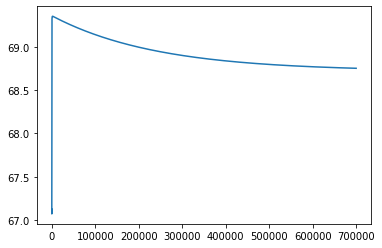

In [6]:
plt.plot(Gg[:720000])
# plt.plot(Gg)

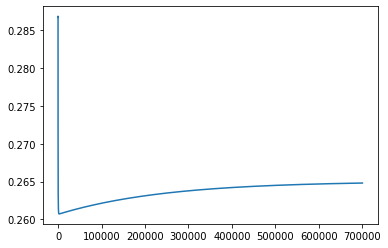

In [7]:
# plt.plot(I[5000:])
plt.plot(I)

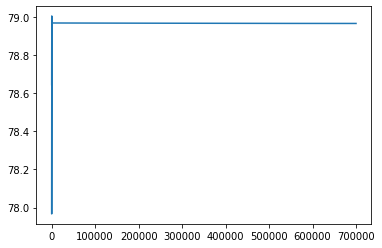

In [8]:
# plt.plot(G[5000:])
plt.plot(G)

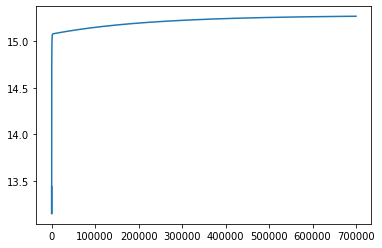

In [9]:
# plt.plot(NEFAp[5000:])
plt.plot(NEFAp)

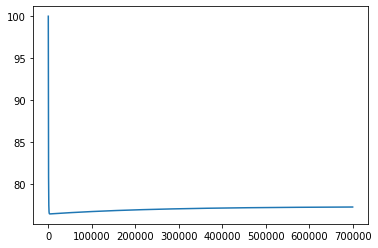

In [10]:
# plt.plot(VLDLTG[5000:])
# plt.plot(11*L[5000:])
plt.plot(VLDLTG)

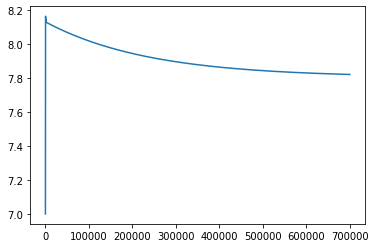

In [11]:
plt.plot(L[:720000])
# plt.plot(L)

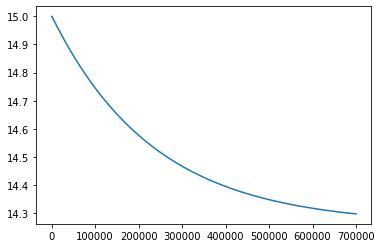

In [12]:
plt.plot(F[:720000])
# plt.plot(F)

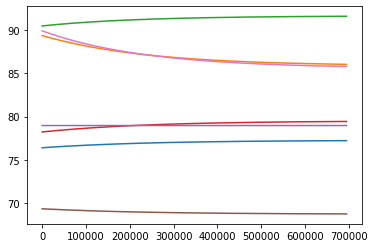

In [13]:
plt.plot(VLDLTG[5000:])
plt.plot(11*L[5000:])
plt.plot(6*NEFAp[5000:])
plt.plot(300*I[5000:])
plt.plot(G[5000:])
plt.plot(Gg[5000:])
plt.plot(6*F[5000:])

In [14]:
# vSL0

In [15]:
vLep_plus

0.5857707233471154

In [16]:
vASI

1.203014215486797

In [17]:
rADNL,vLep_minus,vyCHO,ASI,vASI0,I0

(0.7234, 0.4142292766528845, 1.6363636363636365, 1, 1, 0.3)

In [18]:
rLI,vfast,vLep_plus,vASI,ASI,I0,I0,F[it],F0,rLox,ATGox,vfed

(152.8,
 0.8099665303086648,
 0.5857707233471154,
 1.203014215486797,
 1,
 0.3,
 0.3,
 14.298267903003373,
 15,
 1,
 9.2593,
 1.1900334696913353)

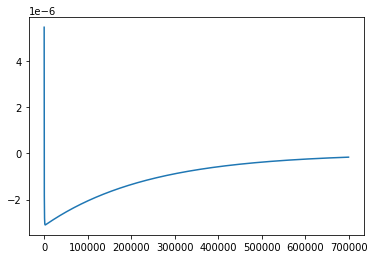

In [19]:
plt.plot(dv_F_all)

In [20]:
SL

1

In [21]:
vADNL

0.30679469750101834

In [22]:
TGin,XCMTG,vfast,kVLDLTGpfast,VLDLTG0,vfed,kVLDLTGpfed,vADNL,kCHO

(231.4833,
 0,
 0.8099665303086648,
 0.2773,
 100,
 1.1900334696913353,
 0.154,
 0.30679469750101834,
 1)